In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import io
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tdf = pickle.load(open('../input/testandtrain/test_with_lemm_2.pkl','rb'))
main_df = pickle.load(open('../input/testandtrain/train_with_lemm_2.pkl','rb'))

In [3]:
tdf['text']

0                                      interview execution
1        know post truthful admins hate wont anything e...
2               z youre real bore go bore someone else twt
3        yet remain confusion mention sac withdraw berg...
4             refer lose interest vandalise talk page dark
                               ...                        
38292    please refrain remove content wikipedia storm ...
38293                                                  utc
38294    list girl alphabetical order kep move victoria...
38295    dumb fuck delete angry nintendo nerd page dumb...
38296    fine job would never find log lok carefuly ima...
Name: text, Length: 38297, dtype: object

In [4]:
main_df

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,a8be7c5d4527adbbf15f,utci interest argue policy resolve ongoing con...,0,0,0,0,0,0
1,0b7ca73f388222aad64d,aded mising parameter templateinfobox organiza...,0,0,0,0,0,0
2,db934381501872ba6f38,sandbox madre sandbox,1,0,0,0,0,0
3,228015c4a87c4b1f09a7,god sir sir obviously comprehend importance sc...,1,0,1,1,1,0
4,b18f26cfa1408b52e949,source incase forget someone else want pick gr...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
89354,748a13233c1ea91c4584,becuase critic actualy read boks,0,0,0,0,0,0
89355,e49b832cc766ee220113,youre go technical boyd never post goglegroups...,0,0,0,0,0,0
89356,ff4751b348157ac2b585,join u fb helo pakistani wikipedians asalamoal...,0,0,0,0,0,0
89357,94a3215b11a49ba57d61,lockhart update reference denis lockhart mwala,0,0,0,0,0,0


In [16]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38297 entries, 0 to 38296
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      38297 non-null  object
 1   text    38297 non-null  object
dtypes: object(2)
memory usage: 598.5+ KB


## Classifier Chain

In [5]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
x_train = main_df['text'].head(15000)
x_train

0        utci interest argue policy resolve ongoing con...
1        aded mising parameter templateinfobox organiza...
2                                    sandbox madre sandbox
3        god sir sir obviously comprehend importance sc...
4        source incase forget someone else want pick gr...
                               ...                        
14995    thank im expert string instrument help bagpipe...
14996    actualy mention source late article open artic...
14997    rofl thats thing hasnt hapened yet along selfb...
14998    age since time doesnt realy pa show homer age ...
14999    like great job thanksi especialy like fact peo...
Name: text, Length: 15000, dtype: object

In [7]:
y_train = main_df.drop(labels = ['id','text'], axis=1).head(15000)
y_train

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,1,1,1,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
14995,0,0,0,0,0,0
14996,0,0,0,0,0,0
14997,0,0,0,0,0,0
14998,0,0,0,0,0,0


In [8]:
x_test = tdf['text']
type(x_test)

pandas.core.series.Series

In [9]:
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [10]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train_tfidf, y_train)

ClassifierChain(classifier=LogisticRegression(), require_dense=[True, True])

In [11]:
# predict
y_pred = classifier.predict_proba(x_test_tfidf)

In [12]:
y_pred

<38297x6 sparse matrix of type '<class 'numpy.float64'>'
	with 229782 stored elements in Compressed Sparse Column format>

In [13]:
labels = main_df.iloc[:,2:8]
labels

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,1,1,1,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
89354,0,0,0,0,0,0
89355,0,0,0,0,0,0
89356,0,0,0,0,0,0
89357,0,0,0,0,0,0


In [15]:
y_pred = y_pred.toarray()

In [16]:
y_pred_df = pd.DataFrame(y_pred,columns = labels.columns)
y_pred_df

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,0.104800,0.000434,0.003618,0.000612,0.003690,0.000846
1,0.223649,0.000247,0.004230,0.000542,0.003266,0.000702
2,0.260670,0.000412,0.005378,0.000697,0.004370,0.000805
3,0.051655,0.000377,0.004041,0.000593,0.002871,0.000711
4,0.044735,0.000317,0.002791,0.000507,0.002061,0.000661
...,...,...,...,...,...,...
38292,0.006338,0.000229,0.002424,0.000462,0.001774,0.000477
38293,0.018515,0.000413,0.002908,0.000582,0.003344,0.000778
38294,0.039060,0.000395,0.004204,0.000546,0.003274,0.000604
38295,0.986294,0.234234,0.931438,0.025603,0.905458,0.088567


In [ ]:
submission_df = pd.concat([tdf.id,y_pred_df],axis=1)
submission_df.to_csv('submission.csv',index = False)

## Label Powerset

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x_train = main_df['text'].head(10000)
x_train

In [ ]:
y_train = main_df.drop(labels = ['id','text'], axis=1).head(10000)
y_train

In [ ]:
x_test = tdf['text']
x_test

In [ ]:
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [ ]:
classifier = LabelPowerset(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train_tfidf, y_train)

In [ ]:
# predict
y_pred = classifier.predict_proba(x_test_tfidf)

In [ ]:
y_pred = y_pred.toarray()

In [ ]:
labels = main_df.iloc[:,2:8]
labels

In [ ]:
y_pred.shape

In [ ]:
y_pred_df = pd.DataFrame(y_pred,columns = labels.columns)
y_pred_df

In [ ]:
submission_df = pd.concat([tdf.id,y_pred_df],axis=1)
submission_df.to_csv('submission.csv',index = False)

## MLknn

In [ ]:
#from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#k=6 since there are 6 labels
classifier_new = MLkNN(k=6)

In [ ]:
x_train = main_df['text'].head(10000)
x_train

In [ ]:
y_train = main_df.drop(labels = ['id','text'], axis=1).head(10000)
y_train

In [ ]:
x_test = tdf['text']
x_test

In [ ]:
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [ ]:
x_train_tfidf = lil_matrix(x_train_tfidf).toarray()
y_train = lil_matrix(y_train).toarray()
x_test_tfidf = lil_matrix(x_test_tfidf).toarray()

In [ ]:
# train
classifier_new.fit(x_train_tfidf, y_train)

In [ ]:
# predict
y_pred = classifier_new.predict(x_test_tfidf)

## Linear SVC

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report

In [5]:
X_train = main_df['text']

In [7]:
y_train = main_df.drop(labels = ['id','text'], axis=1)

In [8]:
categories = main_df.iloc[:,2:8].columns

In [9]:
X_test = tdf['text']

In [ ]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)

**since we have to find probability of labels we cannot directly use onevsrest because of the error : This 'OneVsRestClassifier' has no attribute 'predict_proba'**

In [10]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', CalibratedClassifierCV(LinearSVC(C = 10))),
            ])
cla = OneVsRestClassifier(SVC_pipeline)
cla.fit(X_train, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('clf',
                                               CalibratedClassifierCV(base_estimator=LinearSVC(C=10)))]))

In [11]:
y_pred_svc = cla.predict_proba(X_test)

In [12]:
y_pred_svc.shape

(38297, 6)

In [13]:
y_pred_svc

array([[1.70391107e-01, 4.44953455e-03, 1.97591234e-03, 6.81200640e-04,
        1.79114300e-03, 1.96399698e-03],
       [5.60333981e-01, 1.06906238e-02, 2.79940220e-02, 2.02496465e-03,
        1.06263908e-01, 3.09471682e-03],
       [2.92418769e-01, 3.10111041e-03, 1.02386010e-01, 1.06203947e-03,
        6.31791555e-02, 7.71424120e-03],
       ...,
       [6.97491675e-03, 5.16868318e-04, 8.57713607e-03, 1.77557770e-04,
        2.28373323e-02, 1.17974089e-03],
       [9.99998869e-01, 5.78736406e-01, 9.99903357e-01, 8.99214208e-03,
        9.77605332e-01, 2.53610878e-02],
       [9.98316264e-03, 2.28602266e-03, 1.20480085e-03, 1.46304882e-04,
        2.38564816e-03, 8.47497354e-04]])

In [14]:
y_pred_df = pd.DataFrame(y_pred_svc,columns = categories)
y_pred_df

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,0.170391,0.004450,0.001976,0.000681,0.001791,0.001964
1,0.560334,0.010691,0.027994,0.002025,0.106264,0.003095
2,0.292419,0.003101,0.102386,0.001062,0.063179,0.007714
3,0.011533,0.002475,0.001515,0.000366,0.000608,0.002441
4,0.048458,0.012955,0.006402,0.000080,0.012449,0.000395
...,...,...,...,...,...,...
38292,0.002313,0.000599,0.006705,0.000555,0.003945,0.001124
38293,0.000486,0.012229,0.003478,0.000057,0.003488,0.001334
38294,0.006975,0.000517,0.008577,0.000178,0.022837,0.001180
38295,0.999999,0.578736,0.999903,0.008992,0.977605,0.025361


In [16]:
submission_df = pd.concat([tdf.id,y_pred_df],axis=1)
submission_df.to_csv('submission.csv',index = False)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train = main_df['text']

In [ ]:
y_train = main_df.drop(labels = ['id','text'], axis=1)

In [ ]:
X_test = tdf['text']

In [ ]:
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

In [ ]:
#Fitting Decision Tree classifier to the training set    
classifier= DecisionTreeClassifier()  
classifier.fit(x_train_tfidf, y_train)  

In [ ]:
y_pred_dt = classifier.predict_proba(x_test_tfidf)
#y_pred_lg = classifier.predict_log_proba(x_test_tfidf)

In [ ]:
categories = main_df.iloc[:,2:8].columns

In [ ]:
classifier.get_depth()

In [ ]:
classifier.get_n_leaves()

In [ ]:
y_pred_dt
# returning 3D array

In [ ]:
y_pred_df_1 = pd.DataFrame(y_pred_dt,columns = categories)
y_pred_df_1

## MultiOutput Classifier

In [26]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [33]:
X_train = main_df['text']

In [34]:
y_train = main_df.drop(labels = ['id','text'], axis=1)

In [35]:
X_test = tdf['text']

In [36]:
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

In [37]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_train_tfidf, y_train, test_size=0.33, random_state=42)

# Create the SVM
svm = LinearSVC()

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(X_train, y_train)

In [38]:
# Get predictions for test data
y_test_pred = multilabel_classifier.predict(X_test)

In [15]:
# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)

In [17]:
matrices

array([[[26469,   248],
        [  957,  1815]],

       [[29129,    69],
        [  225,    66]],

       [[27835,   135],
        [  484,  1035]],

       [[29390,     3],
        [   81,    15]],

       [[27883,   195],
        [  632,   779]],

       [[29210,    26],
        [  209,    44]]])

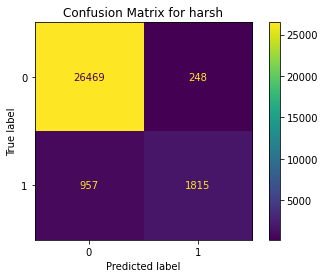

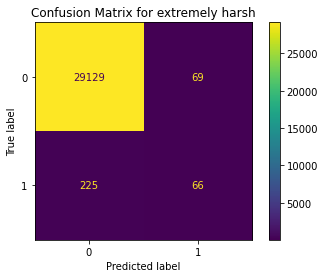

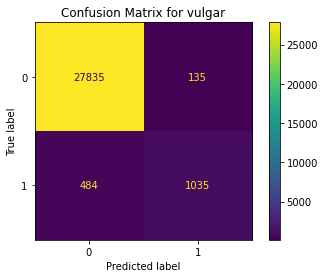

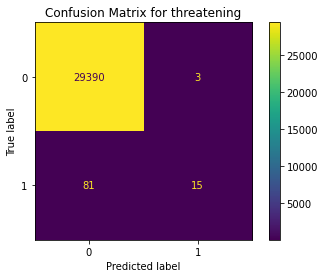

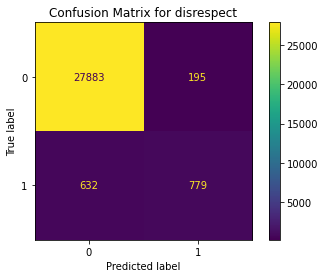

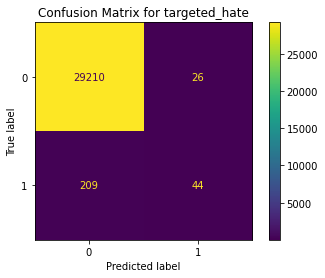

In [22]:
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for harsh')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for extremely harsh')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[2], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for vulgar')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[3], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for threatening')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[4], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for disrespect')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[5], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for targeted_hate')
plt.show()

In [44]:
y_train.shape

(59870, 6)

In [47]:
yy = y_train.head(29489)

In [46]:
y_test_pred.shape

(29489, 6)

In [51]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(yy, y_test_pred)*100

83.44806538031129

## XGBoost

In [20]:
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
X_train = main_df['text']

In [22]:
y_train = main_df.drop(labels = ['id','text'], axis=1)

In [23]:
X_test = tdf['text']

In [24]:
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

In [17]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
y_pred = xgb_clf.predict_proba(x_test_tfidf)

In [26]:
categories = main_df.iloc[:,2:8].columns

In [27]:
y_pred_df = pd.DataFrame(y_pred,columns = categories)
y_pred_df

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,0.059576,0.003772,0.020237,0.000704,0.024908,0.004147
1,0.672233,0.000125,0.006000,0.000057,0.052414,0.002133
2,0.153774,0.009824,0.020903,0.003273,0.047614,0.007809
3,0.028054,0.000649,0.006546,0.000230,0.004386,0.001016
4,0.023089,0.001458,0.007860,0.000088,0.006149,0.000375
...,...,...,...,...,...,...
38292,0.001813,0.000036,0.000861,0.000020,0.001565,0.000081
38293,0.024186,0.003772,0.012379,0.000704,0.014865,0.004147
38294,0.018855,0.000219,0.004046,0.000182,0.005519,0.000328
38295,0.999288,0.641275,0.978244,0.000736,0.967045,0.129180


In [29]:
submission_df = pd.concat([tdf.id,y_pred_df],axis=1)
submission_df.to_csv('submission.csv',index = False)

## Ridge Classifier

In [23]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from scipy.sparse import hstack

In [29]:
X_train = main_df['text']

In [ ]:
y_train = main_df.drop(labels = ['id','text'], axis=1)

In [48]:
X_test = tdf['text']

In [ ]:
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

In [33]:
x_train_tfidf

<15000x46612 sparse matrix of type '<class 'numpy.float64'>'
	with 395855 stored elements in Compressed Sparse Row format>

In [34]:
x_test_tfidf

<38297x46612 sparse matrix of type '<class 'numpy.float64'>'
	with 901920 stored elements in Compressed Sparse Row format>

In [18]:
predict_dic = pd.DataFrame(columns=['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate'])

In [37]:
categories = main_df.iloc[:,2:8].columns

In [49]:
char_vectorizer = TfidfVectorizer (
    sublinear_tf = True,
    strip_accents = 'unicode', # Remove accents and perform other character normalization during the preprocessing step. 
                               # ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. 
                               # ‘unicode’ is a slightly slower method that works on any characters.
    analyzer = 'char',
    ngram_range = (2, 4),  # ngram is the set of n words together.
    min_df = 2, 
    max_df = 0.5,
    max_features = 20000
)
char_vectorizer.fit(main_df) # We fit on complete training + test data so as to achieve a better fit.
train_char_features = char_vectorizer.transform(X_train)
test_char_features = char_vectorizer.transform(X_test)

In [50]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,  # It seems unlikely that twenty occurrences of a term in a document truly carry twenty times the significance of a single occurrence. 
    # Accordingly, there has been considerable research into variants of term frequency that go beyond counting the number of occurrences of a term. 
    # A common modification is to use instead the logarithm of the term frequency, which assigns a weight. 1 + log(tf)
    strip_accents = 'unicode', # Remove accents and perform other character normalization during the preprocessing step. 
                               # ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. 
                               # ‘unicode’ is a slightly slower method that works on any characters.
    analyzer = 'word',  # Whether the feature should be made of word or character.
    token_pattern = '(?u)\\b\\w\\w+\\b\\w{,1}',
    lowercase = False,  # Do not convert the uppercase letters into lowercase because they carry significance.
    stop_words = 'english',  # Remove all the stop words of english 
    # ngram is the set of n words together.
    ngram_range = (1, 1),  # We consider set of 1 or 2 words together for tokenization.
    min_df = 1,
    max_df = 0.25,
    norm = 'l2',
    max_features = 30000
) #lowercase = true : convert all characters into lower case before tokenzing
word_vectorizer.fit(main_df) # Apply tfidf fitting on the whole preprocessed text data so that we schieve a better fitted model.
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

In [52]:
train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

In [53]:
predict_dic['id'] = tdf['id']
overall_score = []
for x in categories:
        print('... Processing {}'.format(x))
        class_column = labels[x].values
        score = 0
        if x in ['targeted_hate', 'threatening']:
            model = LogisticRegression(n_jobs=-1, random_state=0, C=3)
            model.fit(train_features,labels[x])
            predict_dic[x] = model.predict_proba(test_features)[:,1].tolist()
        else:
            rid =  RidgeClassifier(alpha=17,fit_intercept=True, solver='sag', max_iter=250,random_state=0,tol = 0.0005)
            rid.fit(train_features,labels[x])
            d = rid.decision_function(test_features)
            probs = np.exp(d) / np.sum(np.exp(d))
            predict_dic[x] = probs.tolist()

... Processing harsh
... Processing extremely_harsh
... Processing vulgar
... Processing threatening
... Processing disrespect
... Processing targeted_hate


In [54]:
predict_dic

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate,id
0,0.000027,0.000026,0.000026,0.002141,0.000026,0.021840,e0ae9d9474a5689a5791
1,0.000022,0.000025,0.000023,0.001209,0.000024,0.003734,b64a191301cad4f11287
2,0.000026,0.000026,0.000026,0.002231,0.000026,0.007583,5e1953d9ae04bdc66408
3,0.000026,0.000026,0.000026,0.002484,0.000026,0.005820,23128f98196c8e8f7b90
4,0.000024,0.000026,0.000025,0.001204,0.000025,0.005248,2d3f1254f71472bf2b78
...,...,...,...,...,...,...,...
38292,0.000024,0.000026,0.000024,0.001290,0.000025,0.007616,64ebe2494b078bc1ec18
38293,0.000033,0.000027,0.000031,0.006388,0.000030,0.022400,16259bc32bd803e6acf5
38294,0.000025,0.000026,0.000026,0.001457,0.000025,0.004577,1fe631c9625d88a4d492
38295,0.000029,0.000027,0.000028,0.002641,0.000028,0.013245,085ab9387dce9d4e0b68


In [ ]:
submission_df = pd.concat([tdf.id,predict_dic],axis=1)
submission_df.to_csv('submission.csv',index = False)